## Image Classification Using CNN 
- In this case, I am working on classifier on image cats and dogs.

Set up :
- directory for train and validate data.
- dimension of our image.
- parameters for NN model.
- Image data generator(Generates more images for better results/more generalized model)
- a basic CNN structure - feature detection layer(convolution2D , activation and pooling layer) then pass it to classification layer (Fully Connected , activation layer).
- Compile model
- Fit model 
- Plot accuracy and loss 
- Way of Improvement- adding regularization(dropout, recurrent dropout, L1, L2, pooling, early stopping)

In [88]:
from keras.preprocessing.image import ImageDataGenerator    
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 25
batch_size = 16

if K.image_data_format() == 'channels_first':
        input_shape = (3, img_width, img_height)
else:
        input_shape = (img_width, img_height, 3)

In [89]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,      #transform every pixel value from range [0,255] 
    shear_range=0.2,       #shear angles in degree
    zoom_range=0.2,        #random zoom
    horizontal_flip=True)  #flip the image horizontally

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [90]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print(train_generator.class_indices)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
Found 1008 images belonging to 2 classes.


In [91]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))  #input features and activate specific features  
model.add(Activation('relu'))   #convert negative value into zero and maintaining positive value
model.add(MaxPooling2D(pool_size=(2, 2)))   #reduce number of parameter 

model.add(Flatten())
model.add(Dense(64))    
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [92]:
model.compile(loss='binary_crossentropy', #uses for binary class, multi class = categorical crossentropy
              optimizer='rmsprop',    #you can use adam too 
               metrics=['accuracy'])

In [93]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size, #hits this step count it knows that it’s a new epoch
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

# model.save('model.h5')

Epoch 1/25
125/125 [==============================] - 86s 688ms/step - loss: 8.0241 - acc: 0.4990 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/25
125/125 [==============================] - 69s 553ms/step - loss: 8.0671 - acc: 0.4995 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/25
125/125 [==============================] - 79s 629ms/step - loss: 8.0671 - acc: 0.4995 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/25
125/125 [==============================] - 83s 665ms/step - loss: 8.0671 - acc: 0.4995 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/25
125/125 [==============================] - 81s 649ms/step - loss: 8.0671 - acc: 0.4995 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/25
125/125 [==============================] - 72s 578ms/step - loss: 8.0671 - acc: 0.4995 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/25
125/125 [==============================] - 82s 655ms/step - loss: 8.0671 - acc: 0.4995 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/25
125/125 [==============================] - 8

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


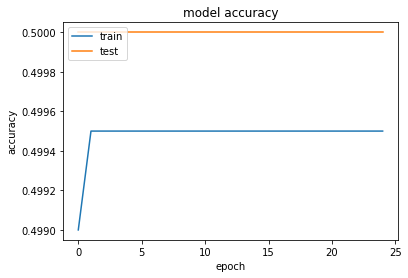

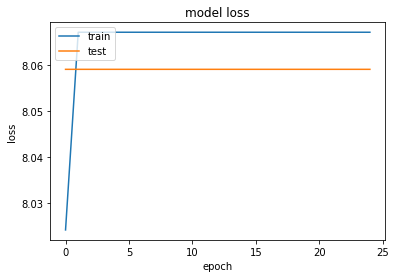

In [94]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Basic CNN model does not do very well in this case. As you can see the accuracy is always 50%.

In this case, I am trying to add another CNN layer for it.

In [66]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=input_shape))  #input features and activate specific features  
model1.add(Activation('relu'))   #convert negative value into zero and maintaining positive value
model1.add(MaxPooling2D(pool_size=(2, 2)))   #reduce number of parameter 

model1.add(Conv2D(32, (32, 3)))    
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(64))    
model1.add(Activation('relu'))
model1.add(Dropout(0.5))  #regularization 
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [67]:
model1.compile(loss='binary_crossentropy', #uses for binary class, multi class = categorical crossentropy
              optimizer='rmsprop',    #you can use adam too 
               metrics=['accuracy'])

In [68]:
history1 = model1.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/25
125/125 [==============================] - 166s 1s/step - loss: 0.9107 - acc: 0.4845 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 2/25
125/125 [==============================] - 163s 1s/step - loss: 0.6993 - acc: 0.5370 - val_loss: 0.6535 - val_acc: 0.6339
Epoch 3/25
125/125 [==============================] - 162s 1s/step - loss: 0.6468 - acc: 0.6290 - val_loss: 0.5785 - val_acc: 0.6875
Epoch 4/25
125/125 [==============================] - 162s 1s/step - loss: 0.6202 - acc: 0.6650 - val_loss: 0.5984 - val_acc: 0.6895
Epoch 5/25
125/125 [==============================] - 161s 1s/step - loss: 0.6057 - acc: 0.6735 - val_loss: 0.5747 - val_acc: 0.7123
Epoch 6/25
125/125 [==============================] - 163s 1s/step - loss: 0.5904 - acc: 0.6960 - val_loss: 0.5747 - val_acc: 0.7083
Epoch 7/25
125/125 [==============================] - 162s 1s/step - loss: 0.5672 - acc: 0.7115 - val_loss: 0.5562 - val_acc: 0.7034
Epoch 8/25
125/125 [==============================] - 163s 1s/step - 

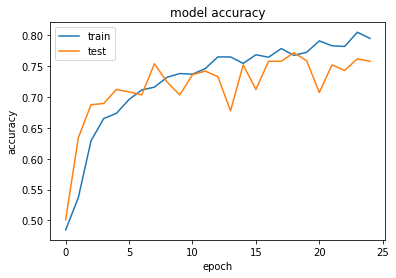

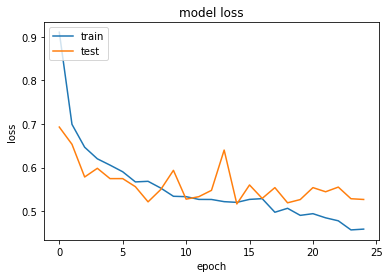

In [69]:
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- This model does shows alittle better as the train and test is converging to each other. 
- Unfortunately, the testing accuracy is not stable. I am trying to add L2 regualizer to avoid it to be overfitting.    
- Overfitting can be view by when both of the accuracy is getting wider from the end. 
- From this example, maybe 20 epochs is good enough. Also, adding more layer usually helps with the model and change a universal 'adam' optimizer.

In [101]:
from keras import regularizers
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=input_shape))  #input features and activate specific features  
model2.add(Activation('relu'))   #convert negative value into zero and maintaining positive value
model2.add(MaxPooling2D(pool_size=(2, 2)))   #reduce number of parameter 

model2.add(Conv2D(32, (3, 3)))
model2.add(Dropout(0.3))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) 


model2.add(Conv2D(32, (3, 3)))
model2.add(Dense(32,input_shape=input_shape,kernel_regularizer=regularizers.l2(0.04)))  #regularization 
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

In [102]:
model2.compile(loss='binary_crossentropy', #uses for binary class, multi class = categorical crossentropy
              optimizer='adam',    #you can use adam too 
               metrics=['accuracy'])

In [103]:
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/25
125/125 [==============================] - 123s 983ms/step - loss: 1.3891 - acc: 0.5050 - val_loss: 1.0156 - val_acc: 0.5377
Epoch 2/25
125/125 [==============================] - 104s 832ms/step - loss: 0.8480 - acc: 0.5805 - val_loss: 0.7350 - val_acc: 0.5784
Epoch 3/25
125/125 [==============================] - 102s 819ms/step - loss: 0.7057 - acc: 0.6045 - val_loss: 0.6863 - val_acc: 0.5992
Epoch 4/25
125/125 [==============================] - 103s 825ms/step - loss: 0.6488 - acc: 0.6290 - val_loss: 0.6614 - val_acc: 0.6200
Epoch 5/25
125/125 [==============================] - 107s 858ms/step - loss: 0.6235 - acc: 0.6610 - val_loss: 0.6203 - val_acc: 0.6786
Epoch 6/25
125/125 [==============================] - 101s 810ms/step - loss: 0.6004 - acc: 0.6785 - val_loss: 0.6148 - val_acc: 0.6518
Epoch 7/25
125/125 [==============================] - 107s 858ms/step - loss: 0.5893 - acc: 0.6965 - val_loss: 0.5839 - val_acc: 0.6855
Epoch 8/25
125/125 [============================

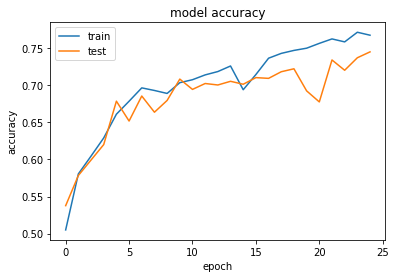

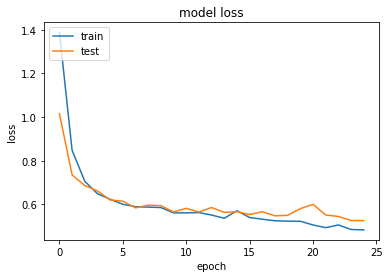

In [104]:
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- It seems like this model is geting better. 
- L2 regularizer and adding layers helps with my model.
- Both loss and accuracy is showing good results. 

After making sure we have the right model, we can save into h5 file as future classification model. 

In [44]:
#!pip install h5py                                   # not recommend to save keras model in pickle , so I use hdf5 file
from keras.models import model_from_json
model2_json = model2.to_json()
with open("/Users/yeezhianliew/Desktop/model2.json", "w") as json_file:
    json_file.write(model2_json)
model2.save_weights("/Users/yeezhianliew/Desktop/model2.h5")
print("Saved model to disk")                        # save the model for testing later

Saved model to disk


In [45]:
json_file = open('/Users/yeezhianliew/Desktop/model2.json', 'r')                  
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)                        #load the model
loaded_model.load_weights("/Users/yeezhianliew/Desktop/model2.h5")       #load weights into new model
print("Loaded model from disk")

Loaded model from disk


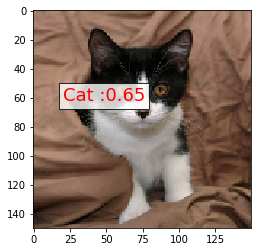

In [74]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/Users/yeezhianliew/Desktop/Classification & Object Detection/Image Classification/data/validation/cats/cat.1002.jpg', 
                      target_size=(150, 150))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = loaded_model.predict(img, batch_size=None) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [72]:
import pandas as pd
validation_generator.reset
ytesthat = loaded_model.predict_generator(validation_generator,steps=1)
df = pd.DataFrame({
    'filename':validation_generator.filenames,
    'predict':ytesthat[:,0],
    'y':validation_generator.classes
})

In [73]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,cats/cat.1002.jpg,0.69093,0,1
1,cats/cat.1003.jpg,0.32970,0,0
2,cats/cat.1004.jpg,0.46549,0,0
3,cats/cat.1005.jpg,0.21079,0,0
4,cats/cat.1006.jpg,0.47612,0,0
5,cats/cat.1007.jpg,0.99491,0,1
6,cats/cat.1008.jpg,0.29787,0,0
7,cats/cat.1009.jpg,0.28218,0,0
8,cats/cat.1010.jpg,0.99543,0,1
9,cats/cat.1011.jpg,0.79454,0,1


In [75]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 519


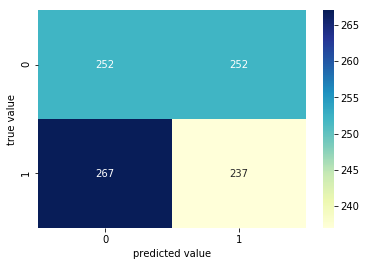

In [76]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [80]:
%%capture
# Model Accuracy
x1 = model2.evaluate_generator(train_generator,steps =1)
x2 = model2.evaluate_generator(validation_generator,steps =1)

In [82]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 75.35%     Training loss  : 0.581637
Validation Accuracy: 72.72%     Validation loss: 0.598007


Loss and accuracy does not have too big differences which means our model does not have overfitting occurs.

## Future 
- We can add early stopping to the model so that it will stop when it detects if there is no improvement during the epochs. 
- trying different regularizer such as L1, recurrent dropout, weight and bias regularizer. 
- place more epochs and see whether the model will be overfitting. 
- You can always tune the batch size too. 
- Also plotting confusion matrix, AUC curve, learning curves(bias and variance) to have more ideas on how the model is working through time. 
- The more data, the better for the model, so that the model does not just memorized the pattern. (more generalized model)
- Deeper analysis - batch wise scaling, CIFAR(pixer scaling method) 